RMSE: 21.86
R² Score: 0.946


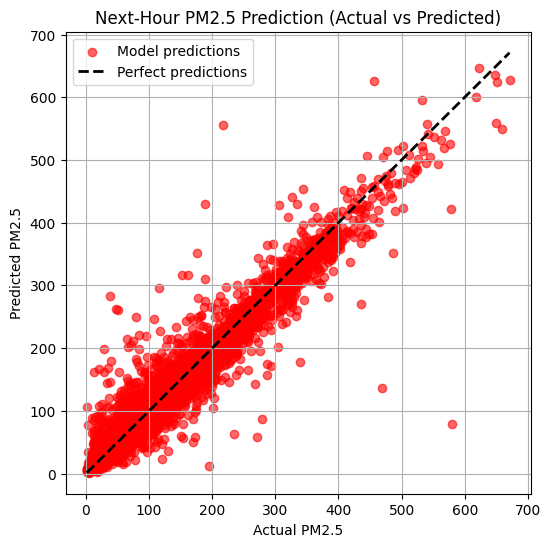

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import os

df = pd.read_csv(r"C:\Users\srust\Downloads\data.csv")
df = df.rename(columns={"pm2.5": "pm25"})
df = df.ffill().bfill()

features = ["pm25", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
data = df[features]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

X = scaled[:-1]
y = scaled[1:, 0]

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def inverse_pm25(vals):
    dummy = np.zeros((len(vals), scaled.shape[1]))
    dummy[:, 0] = vals
    return scaler.inverse_transform(dummy)[:, 0]

y_test_inv = inverse_pm25(y_test)
y_pred_inv = inverse_pm25(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

output_dir = r"C:\Users\srust\OneDrive\Desktop\LINEAR_REGRESSION_OUTPUT"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(6,6))

plt.scatter(
    y_test_inv,
    y_pred_inv,
    color="red",
    alpha=0.6,
    label="Model predictions"
)

min_val = min(y_test_inv.min(), y_pred_inv.min())
max_val = max(y_test_inv.max(), y_pred_inv.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'k--',
    linewidth=2,
    label="Perfect predictions"
)

plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Next-Hour PM2.5 Prediction (Actual vs Predicted)")
plt.legend()
plt.grid(True)

plt.savefig(
    rf"{output_dir}\pm25_next_hour_lr.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()




In [7]:
last_input = scaled[-1].reshape(1, -1)

future_pred_scaled = model.predict(last_input)

future_pm25 = inverse_pm25(future_pred_scaled)

print(f"Future 1-hour PM2.5 prediction: {future_pm25[0]:.2f}")


Future 1-hour PM2.5 prediction: 11.92


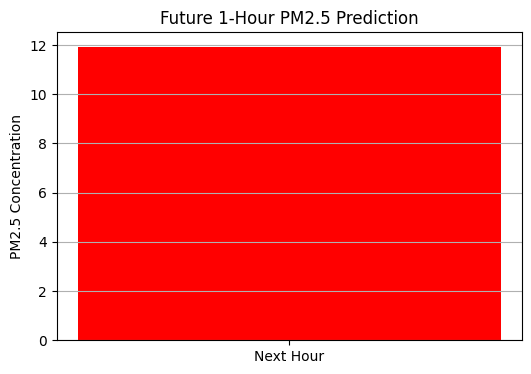

In [8]:
plt.figure(figsize=(6,4))
plt.bar(["Next Hour"], future_pm25, color="red")
plt.title("Future 1-Hour PM2.5 Prediction")
plt.ylabel("PM2.5 Concentration")
plt.grid(axis="y")

plt.savefig(rf"{output_dir}\future_1hr_lr.png", dpi=300, bbox_inches="tight")
plt.show()
